In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
housing_data = pd.read_csv("Maricopa_County_Housing_data.csv")

In [36]:
housing_data.head()

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Property_Type,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,Buyer_Concession_to_Seller,Buyer_Concession_$/%,Seller_Concession_to_Buyer,Seller_Concession_$/%
0,85003,AF,1,1.0,720,340.28,Residential,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0.0,$,3.00,%
1,85003,LS,1,1.0,755,430.46,Residential,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0.0,%,0.00,$
2,85003,SF,4,3.0,"3,415",439.23,Residential,Detached,1940,"11,696",...,Yes,Yes,2.0,0.0,Conventional,Fixed,0.0,$,0.00,$
3,85003,AF,1,1.0,710,436.61,Residential,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0.0,$,6000.00,$
4,85003,AF,2,2.5,"1,510",314.56,Residential,Stacked,2007,654,...,NaN,Yes,2.0,0.0,Conventional,Fixed,0.0,$,3.75,%


In [37]:
housing_data.isna().sum()

Zip_Code                         0
Dwelling_Type                    0
Nr_Bedrooms                      0
Nr_Bathrooms                     0
Approx_SQFT                      0
Price_per_SqFt                   0
Property_Type                    0
Dwelling_Styles                  0
Year_Built                       0
Approx_Lot_SqFt                  0
Pool                             0
HOA_Fee                        917
Land_Lease_Fee                   0
Clubhouse_Rec_Room            2246
Basement                         0
RV_Gate                       2618
List_Price                       0
Sold_Price                       0
Building_Style                2885
Gated_Community               2394
Workout_Facility              2498
Garage_Spaces                    0
Carport_Spaces                   0
Loan_Type                        0
Payment_Type                   950
Buyer_Concession_to_Seller       0
Buyer_Concession_$/%             0
Seller_Concession_to_Buyer       0
Seller_Concession_$/

In [38]:
housing_data["Zip_Code"].unique()

array([85003, 85004, 85006, 85007, 85008, 85009, 85012, 85013, 85014,
       85015, 85016, 85017, 85018, 85019, 85020, 85021, 85022, 85023,
       85024, 85027, 85028, 85029, 85031, 85032, 85033, 85035, 85037,
       85040, 85041, 85042, 85043, 85044, 85045, 85048, 85050, 85051,
       85053, 85054, 85083, 85085, 85086, 85087, 85119, 85120, 85139,
       85142, 85201, 85202, 85203, 85204, 85205, 85206, 85207, 85208,
       85209, 85210, 85212, 85213, 85215, 85224, 85225, 85226, 85233,
       85234, 85248, 85249, 85250, 85251, 85253, 85254, 85255, 85257,
       85258, 85259, 85260, 85262, 85263, 85266, 85268, 85323, 85326,
       85375, 85377, 85378, 85379, 85395, 85396, 85541])

In [39]:
housing_data.shape

(3117, 29)

In [40]:
housing_data["Dwelling_Type"].unique()

array(['AF', 'LS', 'SF', 'TH', 'PH', 'MM', 'GT', 'MD'], dtype=object)

In [41]:
housing_data["Nr_Bedrooms"].unique()

array([1, 4, 2, 3, 5, 6, 7, 0])

In [42]:
housing_data["Nr_Bathrooms"].unique()

array([1.  , 3.  , 2.5 , 1.75, 2.  , 1.5 , 4.5 , 4.  , 3.5 , 2.75, 6.  ,
       5.5 , 7.  , 5.  , 2.25, 6.5 , 3.75, 1.25, 8.  ])

In [43]:
housing_data.dtypes

Zip_Code                        int64
Dwelling_Type                  object
Nr_Bedrooms                     int64
Nr_Bathrooms                  float64
Approx_SQFT                    object
Price_per_SqFt                 object
Property_Type                  object
Dwelling_Styles                object
Year_Built                      int64
Approx_Lot_SqFt                object
Pool                           object
HOA_Fee                       float64
Land_Lease_Fee                 object
Clubhouse_Rec_Room             object
Basement                       object
RV_Gate                        object
List_Price                     object
Sold_Price                     object
Building_Style                 object
Gated_Community                object
Workout_Facility               object
Garage_Spaces                 float64
Carport_Spaces                float64
Loan_Type                      object
Payment_Type                   object
Buyer_Concession_to_Seller    float64
Buyer_Conces

In [44]:
housing_data["Approx_SQFT"].describe()

count      3117
unique     1734
top       1,400
freq         11
Name: Approx_SQFT, dtype: object

In [45]:
# "Approx_SQFT" is an object column
# This is because the values have comma in them
# We need to remove commas before converting the values to int
housing_data["Approx_SQFT"] = housing_data["Approx_SQFT"].apply(lambda x: x.replace(",", ""))

In [46]:
housing_data["Approx_SQFT"] = housing_data["Approx_SQFT"].astype(int)

In [47]:
housing_data["Approx_SQFT"].describe()

count    3117.000000
mean     1948.820661
std       923.387933
min         1.000000
25%      1327.000000
50%      1766.000000
75%      2311.000000
max      8151.000000
Name: Approx_SQFT, dtype: float64

In [48]:
housing_data["Price_per_SqFt"].describe()

count      3117
unique     2892
top       312.5
freq          5
Name: Price_per_SqFt, dtype: object

In [49]:
housing_data["Price_per_SqFt"] = housing_data["Price_per_SqFt"].apply(lambda x: x.replace(",", ""))

In [50]:
housing_data["Price_per_SqFt"] = housing_data["Price_per_SqFt"].astype(float)

In [51]:
housing_data["Price_per_SqFt"].describe()

count      3117.000000
mean        362.590696
std        3131.718320
min          14.160000
25%         237.480000
50%         284.260000
75%         342.000000
max      175000.000000
Name: Price_per_SqFt, dtype: float64

In [52]:
housing_data["Property_Type"].unique()

array(['Residential'], dtype=object)

In [53]:
# "Property_Type" doesn't provide any value as it has the same value
# for all the columns
housing_data["Property_Type"].value_counts()

Residential    3117
Name: Property_Type, dtype: int64

In [54]:
# Dropping "Property_Type" column
housing_data.drop("Property_Type", axis=1, inplace=True)

In [55]:
housing_data["Dwelling_Styles"].unique()

array(['Stacked', 'Detached', 'Attached'], dtype=object)

In [56]:
housing_data["Year_Built"].unique()

array([1964, 2005, 1940, 2007, 2016, 2004, 1963, 1920, 1943, 1911, 1947,
       1958, 1948, 1929, 1945, 1950, 1935, 1952, 1955, 1973, 1966, 1951,
       2002, 1956, 1985, 1999, 1970, 2023, 1928, 1925, 1989, 1982, 1946,
       1980, 1932, 1944, 2019, 1961, 1931, 1954, 2008, 1978, 1965, 1996,
       1957, 1979, 1972, 1998, 1975, 1933, 2017, 2021, 1991, 1953, 1941,
       1974, 1986, 1981, 1967, 1949, 1984, 2018, 2006, 1968, 1988, 1977,
       1995, 2003, 1992, 2000, 2024, 2022, 1990, 1976, 2010, 1959, 1962,
       2015, 1971, 1960, 1987, 2001, 1937, 1993, 1983, 1994, 1997, 2012,
       2020, 1969, 2014, 2013, 2011, 1927, 1942, 2009, 1919, 1936])

In [58]:
housing_data["Approx_Lot_SqFt"] = housing_data["Approx_Lot_SqFt"].apply(lambda x: x.replace(",", ""))

In [60]:
housing_data["Approx_Lot_SqFt"] = housing_data["Approx_Lot_SqFt"].astype(int)

In [61]:
housing_data["Approx_Lot_SqFt"].describe()

count    3.117000e+03
mean     2.769501e+04
std      9.995417e+05
min      0.000000e+00
25%      4.000000e+03
50%      6.707000e+03
75%      9.148000e+03
max      5.580036e+07
Name: Approx_Lot_SqFt, dtype: float64

In [63]:
housing_data["Pool"].unique()

array(['Community', 'Private', 'None', 'Both'], dtype=object)

In [67]:
# "HOA_Fee" has null values
# Create another variable which says whether the field is null
housing_data["HOA_Missing"] = housing_data["HOA_Fee"].isna().astype(int)

In [68]:
housing_data[housing_data["HOA_Missing"]==0]["HOA_Fee"].describe()

count    2200.000000
mean      326.731205
std       486.743921
min         0.000000
25%       115.375000
50%       212.000000
75%       350.000000
max      9102.000000
Name: HOA_Fee, dtype: float64

In [70]:
housing_data["Land_Lease_Fee"].unique()

array(['N', 'Y'], dtype=object)

In [72]:
housing_data["Land_Lease_Fee"].value_counts()

N    3015
Y     102
Name: Land_Lease_Fee, dtype: int64

In [74]:
housing_data["Clubhouse_Rec_Room"].unique()

array(['Yes', nan], dtype=object)

In [76]:
housing_data["Clubhouse_Rec_Room"] = housing_data["Clubhouse_Rec_Room"].fillna("No")

In [77]:
housing_data["Clubhouse_Rec_Room"].value_counts()

No     2246
Yes     871
Name: Clubhouse_Rec_Room, dtype: int64

In [78]:
housing_data["Basement"].unique()

array(['BASEMENT Y/N:\xa0N', 'BASEMENT Y/N:\xa0Y'], dtype=object)

In [80]:
housing_data["Basement"] = housing_data["Basement"].apply(lambda x: "N" if x == 'BASEMENT Y/N:\xa0N' else "Y")

In [81]:
housing_data["Basement"].value_counts()

N    3074
Y      43
Name: Basement, dtype: int64

In [82]:
housing_data["RV_Gate"].unique()

array(['Yes', nan], dtype=object)

In [84]:
housing_data["RV_Gate"] = housing_data["RV_Gate"].fillna("No")

In [85]:
housing_data["RV_Gate"].value_counts()

No     2618
Yes     499
Name: RV_Gate, dtype: int64

In [87]:
housing_data["List_Price"] = housing_data["List_Price"].apply(lambda x: x.replace(",", ""))

In [88]:
housing_data["List_Price"] = housing_data["List_Price"].astype(int)

In [89]:
housing_data["List_Price"].describe()

count    3.117000e+03
mean     6.485430e+05
std      6.298170e+05
min      1.000000e+04
25%      3.680000e+05
50%      4.800000e+05
75%      6.970000e+05
max      1.036400e+07
Name: List_Price, dtype: float64

In [91]:
housing_data["Sold_Price"] = housing_data["Sold_Price"].apply(lambda x: x.replace(",", ""))
housing_data["Sold_Price"] = housing_data["Sold_Price"].astype(int)
housing_data["Sold_Price"].describe()

count    3.117000e+03
mean     6.352639e+05
std      6.138111e+05
min      1.000000e+04
25%      3.600000e+05
50%      4.750000e+05
75%      6.808880e+05
max      1.036400e+07
Name: Sold_Price, dtype: float64

In [93]:
housing_data["Building_Style"].unique()

array(['High Rise', nan, '2-3-4 Plex', 'Clustered', 'String',
       'Clustered · High Rise', '2-3-4 Plex · Clustered'], dtype=object)

In [95]:
housing_data["Building_Style"] = housing_data["Building_Style"].fillna("Missing")

In [97]:
housing_data["Gated_Community"].unique()

array(['Yes', nan], dtype=object)

In [99]:
housing_data["Gated_Community"] = housing_data["Gated_Community"].fillna("No")

In [101]:
housing_data["Workout_Facility"].unique()

array(['Yes', nan], dtype=object)

In [102]:
housing_data["Workout_Facility"] = housing_data["Workout_Facility"].fillna("No")

In [104]:
housing_data["Garage_Spaces"].value_counts()

2.0     1598
0.0      777
3.0      456
1.0      138
4.0       67
2.5       57
1.5        5
6.0        5
3.5        2
18.0       2
4.5        2
10.0       2
5.0        2
6.5        1
9.0        1
14.0       1
7.0        1
Name: Garage_Spaces, dtype: int64

In [106]:
housing_data["Carport_Spaces"].value_counts()

0.0    2412
1.0     422
2.0     258
3.0      14
4.0       7
6.0       2
1.5       2
Name: Carport_Spaces, dtype: int64

In [107]:
housing_data["Loan_Type"].unique()

array(['Conventional', 'VA', 'Cash', 'FHA', 'Other', 'Cash to Loan',
       'Carryback', 'Exchange', 'USDA'], dtype=object)

In [108]:
housing_data["Loan_Type"].value_counts()

Conventional    1487
Cash             878
FHA              396
Other            196
VA               138
Carryback         13
Exchange           5
Cash to Loan       2
USDA               2
Name: Loan_Type, dtype: int64

In [109]:
housing_data["Payment_Type"].value_counts()

Fixed            1625
Other             515
Adjustable         13
Balloon            10
Interest Only       3
Graduated           1
Name: Payment_Type, dtype: int64

In [110]:
housing_data["Payment_Type"].isna().sum()

950

In [111]:
housing_data["Payment_Type"] = housing_data["Payment_Type"].fillna("Missing")

In [112]:
housing_data["Payment_Type"].value_counts()

Fixed            1625
Missing           950
Other             515
Adjustable         13
Balloon            10
Interest Only       3
Graduated           1
Name: Payment_Type, dtype: int64

In [113]:
housing_data["Buyer_Concession_to_Seller"].describe()

count     3117.000000
mean        84.598973
std       1187.284533
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34475.000000
Name: Buyer_Concession_to_Seller, dtype: float64

In [115]:
housing_data["Buyer_Concession_$/%"].unique()

array(['$', '%'], dtype=object)

In [117]:
housing_data.loc[housing_data["Buyer_Concession_$/%"]=="%", "Buyer_Concession_to_Seller"].unique()

array([0.0e+00, 3.0e+00, 5.0e-01, 2.5e+00, 1.0e+00, 1.0e+04, 1.0e+02,
       2.0e+00])

In [118]:
def concession_calculator(concession_value, concession_type, 
                          list_price):
    # convert concession into uniform $ price
    if concession_type == "$":
        return concession_value
    elif concession_type == "%":
        return list_price * concession_value / 100

In [122]:
housing_data["Buyer_Concession"] = housing_data.apply(lambda x: concession_calculator(x["Buyer_Concession_to_Seller"], x["Buyer_Concession_$/%"], x["List_Price"]), axis=1)

In [123]:
housing_data["Buyer_Concession"].describe()

count    3.117000e+03
mean     1.227330e+04
std      6.716983e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.750000e+07
Name: Buyer_Concession, dtype: float64

In [124]:
housing_data["Seller_Concession"] = housing_data.apply(lambda x: concession_calculator(x["Seller_Concession_to_Buyer"], x["Seller_Concession_$/%"], x["List_Price"]), axis=1)

In [125]:
housing_data["Seller_Concession"].describe()

count    3.117000e+03
mean     8.507295e+04
std      1.662037e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.050000e+03
max      4.206900e+07
Name: Seller_Concession, dtype: float64

In [126]:
housing_data.drop(["Buyer_Concession_to_Seller", 
                   "Buyer_Concession_$/%", 
                   "Seller_Concession_to_Buyer", 
                   "Seller_Concession_$/%"], axis=1, inplace=True)

In [127]:
housing_data.shape

(3117, 27)

In [128]:
housing_data.isna().sum()

Zip_Code                0
Dwelling_Type           0
Nr_Bedrooms             0
Nr_Bathrooms            0
Approx_SQFT             0
Price_per_SqFt          0
Dwelling_Styles         0
Year_Built              0
Approx_Lot_SqFt         0
Pool                    0
HOA_Fee               917
Land_Lease_Fee          0
Clubhouse_Rec_Room      0
Basement                0
RV_Gate                 0
List_Price              0
Sold_Price              0
Building_Style          0
Gated_Community         0
Workout_Facility        0
Garage_Spaces           0
Carport_Spaces          0
Loan_Type               0
Payment_Type            0
HOA_Missing             0
Buyer_Concession        0
Seller_Concession       0
dtype: int64

In [129]:
# Zip Code

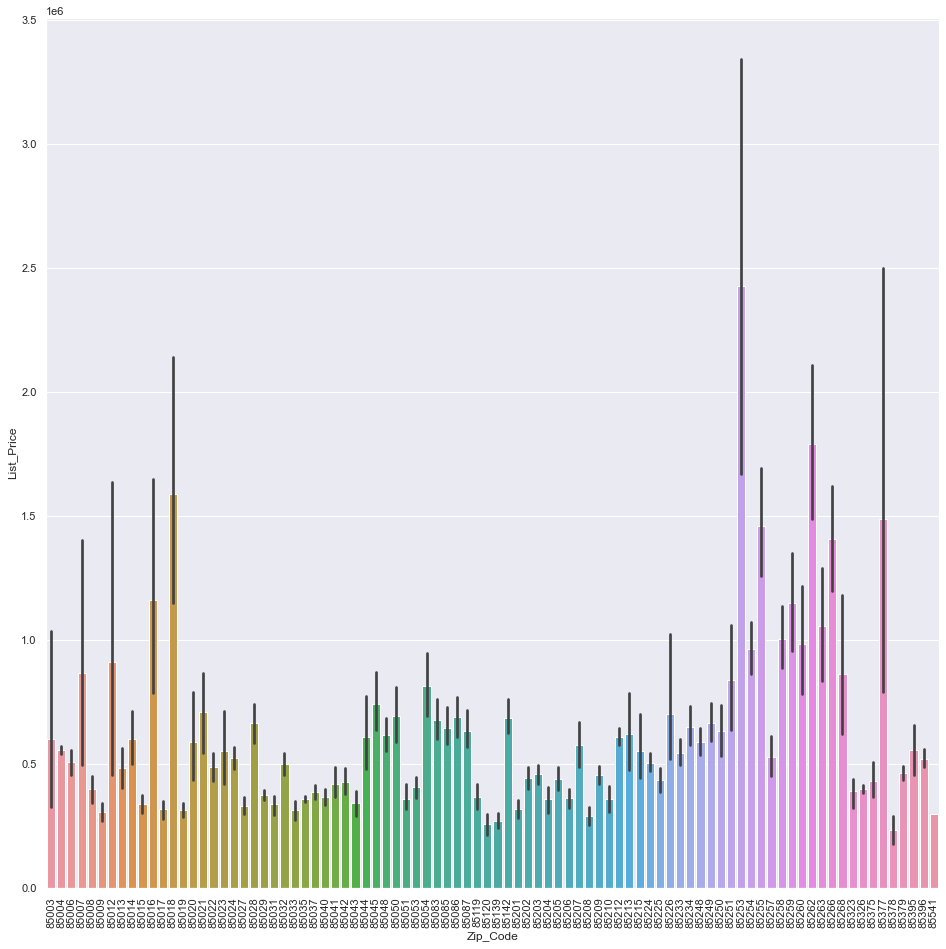

In [135]:
# Mean List_Price by Zip Code
sns.set_theme(rc={'figure.figsize':(16,16)})
plot = sns.barplot(data=housing_data, x="Zip_Code", y="List_Price", estimator=np.mean)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
# You can see the zip codes are already sorted
# And there are clusters of zip codes where the list prices are higher
# You can plot the same for "Sold_Price"
# You can calculate per sq ft price and make the same plot as above


In [136]:
# There are 27 rows where "Sold_Price" is higher than "List Price"
housing_data[housing_data["List_Price"] < housing_data["Sold_Price"]]

,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,Pool,...,Building_Style,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession
4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,Community,...,High Rise,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25
30,85008,SF,4,2.0,1562,220.87,Detached,1955,6756,None,...,Missing,No,No,0.0,1.0,Conventional,Other,0,0.0,8612.50
43,85008,TH,2,2.0,1206,290.21,Attached,2005,1146,Community,...,Missing,No,No,1.0,0.0,VA,Missing,1,0.0,1750.00
46,85008,SF,4,2.0,1366,296.48,Detached,1950,7780,None,...,Missing,No,No,0.0,1.0,VA,Missing,1,0.0,0.00
48,85008,SF,5,1.0,1454,244.15,Detached,1948,9535,None,...,Missing,No,No,0.0,2.0,Cash,Missing,1,0.0,4000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,85396,SF,2,2.0,1378,326.56,Detached,2022,4946,Community,...,Missing,No,No,2.0,0.0,Conventional,Missing,0,0.0,0.00
3106,85396,TH,2,2.5,1278,308.57,Detached,2023,3755,Community,...,Missing,No,No,2.0,0.0,Conventional,Missing,0,0.0,5000.00
3109,85396,SF,4,3.0,2684,162.07,Detached,2021,9218,None,...,Missing,No,No,2.0,0.0,FHA,Missing,0,0.0,12960.00
3113,85396,SF,2,3.0,1854,237.32,Detached,2007,5861,Community,...,Missing,No,No,2.0,0.0,Conventional,Missing,1,0.0,10000.00


In [137]:
# You can calculate the difference between "List_Price" and "Sold_Price"
# and do the same plotting across zip codes